> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No-show appoinment data set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up
>


In [1]:
# Loading the data and libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 This dataframe looks very clean with no null values.
<br> This dataframe consist of 110527 rows

In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



>This dataframe has two unique values ('F' and 'M') for the gender column <br>No-show has two unique values ('Yes' and 'No'). <br>There are 81 different Neighborhoods and 5 handicap values (0 to 4). <br>Scholarship, hipertension, diabetes, alcoholism, and SMS_received all have two possible values 0 and 1. 

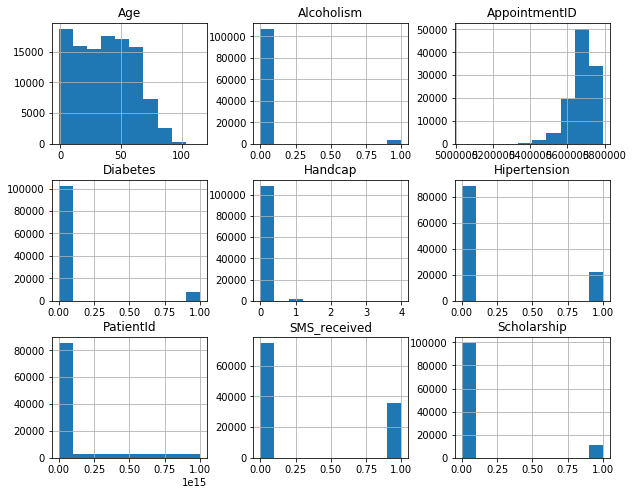

In [6]:
df.hist(figsize = (10,8));

### Data Cleaning 

In [7]:
df.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)

> Here i have decided to drop the Patientid and appointmentId, feels like an unnnessary data that wont be useful.

In [8]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.columns = map(str.lower, df.columns)

I converted all the columns id to smaller case so it will be easy when typing

In [10]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'], errors='coerce')
df['appointmentday'] = pd.to_datetime(df['appointmentday'], errors='coerce')
df['scheduledday'] = df['appointmentday'].apply(lambda x: x.strftime('%m-%d-%Y'))


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 10.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis
### DOES THE DAY OF THE WEEK HAVE EFFECT ON THE NO-SHOW DATASET?

In [12]:
#converting the scheduleday and appontmentday to datetime format
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [14]:
# converting the schedule and appointment day to day of the week
df['schday'] = df['scheduledday'].dt.weekday_name
df['appday'] = df['appointmentday'].dt.weekday_name
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,schday,appday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [15]:
df123 = df.groupby('schday')
df123.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,schday,appday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday
3235,F,2016-05-03,2016-05-03,49,MARIA ORTIZ,0,0,0,0,0,1,Yes,Tuesday,Tuesday
3236,F,2016-05-10,2016-05-10,73,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday
3237,F,2016-05-17,2016-05-17,51,MARIA ORTIZ,0,0,0,0,0,0,No,Tuesday,Tuesday
3238,F,2016-05-24,2016-05-24,20,MARIA ORTIZ,0,0,0,0,0,0,No,Tuesday,Tuesday
3239,F,2016-05-31,2016-05-31,37,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday


I have decided to groupby the scheduleday in order to make my findings

In [16]:
#Changed the no show column ID because of the confusion its causing for python
df.rename(columns={'no-show':'noshow'}, inplace=True)

In [17]:
df_1 = df.query('noshow == "No"')
df_2 = df.query('noshow == "Yes"')
total_1 = df_1['schday'].count()
total_2 = df_2['appday'].count()
print(total_1 , 'is the total number of people that showed')
print(total_2 , 'is the total number of people that did not show')
total_t = total_1 + total_2

88208 is the total number of people that showed
22319 is the total number of people that did not show


The above cell code assign a new dataframe to df_1 where the noshow is no, which means the patient showed. I also assigned a new dataframe to df_2 where the noshow is yes, where the patient didnt show up.
<br> Counted the people that showed and people that didnt show.

Text(0,0.5,'count')

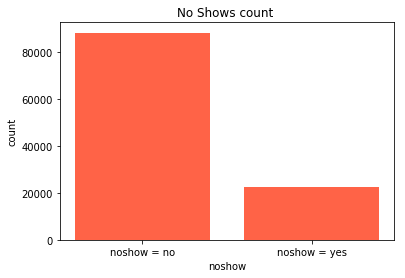

In [18]:
locations = [1, 2]
heights = [total_1, total_2]
labels = ['noshow = no','noshow = yes']
plt.bar(locations, heights, tick_label=labels, color='tomato')
plt.title('No Shows count ')
plt.xlabel('noshow')
plt.ylabel('count')

In [19]:
#count the values of each day and finding the ratio
mon = df_1.query('schday == "Monday"')
mon = mon['schday'].count() / total_1

tue = df_1.query('schday == "Tuesday"')
tue = tue['schday'].count() / total_1

wed = df_1.query('schday == "Wednesday"')
wed = wed['schday'].count() / total_1

thu = df_1.query('schday == "Thursday"')
thu = thu['schday'].count() / total_1

fri = df_1.query('schday == "Friday"')
fri = fri['schday'].count() / total_1

sat = df_1.query('schday == "Saturday"')
sat = sat['schday'].count() / total_1


Text(0,0.5,'proportion ')

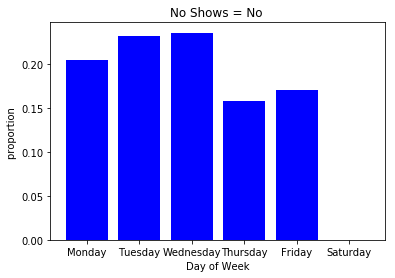

In [20]:
locations = [1, 2, 3, 4, 5, 6]
heights = [mon, tue, wed, thu, fri, sat]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(locations, heights, tick_label=labels, color='blue')
plt.title('No Shows = No ')
plt.xlabel('Day of Week')
plt.ylabel('proportion ')

In [21]:
mon = df_2.query('schday == "Monday"')
mon = mon['schday'].count() / total_2

tue = df_2.query('schday == "Tuesday"')
tue = tue['schday'].count() / total_2

wed = df_2.query('schday == "Wednesday"')
wed = wed['schday'].count() / total_2

thu = df_2.query('schday == "Thursday"')
thu = thu['schday'].count() / total_2

fri = df_2.query('schday == "Friday"')
fri = fri['schday'].count() / total_2

sat = df_2.query('schday == "Saturday"')
sat = sat['schday'].count() / total_2

Text(0,0.5,'proportion')

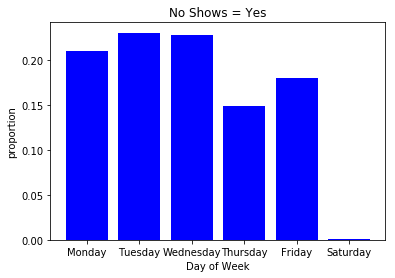

In [22]:
locations = [1, 2, 3, 4, 5, 6]
heights = [mon, tue, wed, thu, fri, sat]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(locations, heights, tick_label=labels, color='blue')
plt.title('No Shows = Yes')
plt.xlabel('Day of Week')
plt.ylabel('proportion')

### CONCLUSION 
- The data set shows that more people showed on the scheduled day
- My finding also shows that the people that showed came mostly on tuesday and wednesday
- The people that didnt show up on the scheduled day also showed more on tuesday and wednesday on the appointment day

 ### IS GENDER A BIAS FOR SHOWING UP?

In [23]:
# sorting the male and female into different dataframe
male = df.query('gender == "M"')
female = df.query('gender == "F"')
total_male = male['gender'].count()
total_female = female['gender'].count()
print (total_male , 'is the total male that have an appointment')
print (total_female , 'is the total female that have an appointment')


38687 is the total male that have an appointment
71840 is the total female that have an appointment


Text(0,0.5,'count')

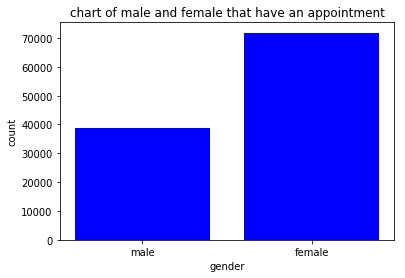

In [24]:
#plotting the graph of male and female that are in the  genereal data set
locations = [1, 2]
heights = [total_male, total_female]
labels = ['male','female']
plt.bar(locations, heights, tick_label=labels, color='blue')
plt.title('chart of male and female that have an appointment')
plt.xlabel('gender')
plt.ylabel('count')

In [25]:
# using the data set of df_1 where the noshow = no 
male = df_1.query('gender == "M"')
female = df_1.query('gender == "F"')
total_male1 = male['gender'].count()
total_female1 = female['gender'].count()
print (total_male , 'is the total male that have an appointment and showed on the appointment day')
print (total_female , 'is the total female that have an appointment and showed on the appointment day')

38687 is the total male that have an appointment and showed on the appointment day
71840 is the total female that have an appointment and showed on the appointment day


Text(0,0.5,'count')

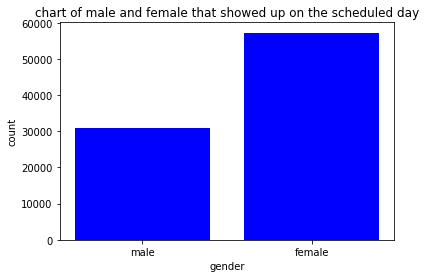

In [26]:
locations = [1, 2]
heights = [total_male1, total_female1]
labels = ['male','female']
plt.bar(locations, heights, tick_label=labels, color='blue')
plt.title('chart of male and female that showed up on the scheduled day')
plt.xlabel('gender')
plt.ylabel('count')

In [27]:
#Using the data frame df_2 where noshow == yes
male = df_2.query('gender == "M"')
female = df_2.query('gender == "F"')
total_male2 = male['gender'].count()
total_female2 = female['gender'].count()
print (total_male , 'is the total male that have an appointment and didnt showed on the appointment day')
print (total_female , 'is the total female that have an appointment and didnt showed on the appointment day')

38687 is the total male that have an appointment and didnt showed on the appointment day
71840 is the total female that have an appointment and didnt showed on the appointment day


Text(0,0.5,'count')

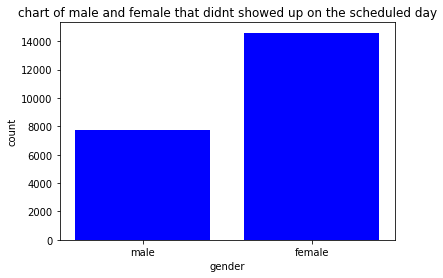

In [28]:
locations = [1, 2]
heights = [total_male2, total_female2]
labels = ['male','female']
plt.bar(locations, heights, tick_label=labels, color='blue')
plt.title('chart of male and female that didnt showed up on the scheduled day')
plt.xlabel('gender')
plt.ylabel('count')

### CONCLUSION
- There are more female than male in the dataset, it is hard to draw conculsion.
- From the visualisation, gender is not an important factor to decide who will show.

### ARE PEOPLE WHO RECEIVE SMS MORE LIKE TO SHOW?

In [29]:
#Creating a new dataframe for people who received sms and people who didnt receive sms
sms_No = df.query('sms_received == "1"')
sms_No1 = sms_No['sms_received'].count()

print(sms_No1, 'is the total number of people that received sms out of', total_t)


sms_show = df_1.query('sms_received == "1"')
sms_show1 = (sms_show['sms_received']).count()

print(sms_show1, 'is the total number of people that received sms and showed out of', total_1)


sms_show = df_2.query('sms_received == "1"')
sms_show2 = sms_show['sms_received'].count()
print(sms_show2, 'is the total number of people that received sms and didnt showed out of', total_2)


35482 is the total number of people that received sms out of 110527
25698 is the total number of people that received sms and showed out of 88208
9784 is the total number of people that received sms and didnt showed out of 22319


In [30]:
print(int((sms_No1 / total_t) * 100),"% receveid sms in total")
print(int((sms_show1 / total_1) * 100), "% received sms and showed")
print(int((sms_show2 / total_2) * 100), "% recieved sms and didnt show")

32 % receveid sms in total
29 % received sms and showed
43 % recieved sms and didnt show


### CONCLUSION
- Very few people received sms in all.
- Very few people received sms and showed
- A little bit higher percentage of people received sms and didnt show.
- We can draw conclusion from this result.

### WHAT IS THE EFFECT OF PEOPLE WHO HAVE SCHOLASHIP, HYPERTENSION, DISABETES, ALCOHOLISM AND ARE HANDICAP TO THE PREDICTION IF THEY WILL SHOW.

In [31]:
scholar_No = df.query('scholarship == "1"')
scholar_No1 = scholar_No['scholarship'].count()

print(scholar_No1, 'is the total number of people that received scholarship out of', total_t)


scholar_show = df_1.query('scholarship == "1"')
scholar_show1 = (scholar_show['scholarship']).count()

print(scholar_show1, 'is the total number of people that received scholarship and showed out of', total_1)


scholar_show = df_2.query('scholarship == "1"')
scholar_show2 = scholar_show['scholarship'].count()
print(scholar_show2, 'is the total number of people that received scholarship and didnt showed out of', total_2)


10861 is the total number of people that received scholarship out of 110527
8283 is the total number of people that received scholarship and showed out of 88208
2578 is the total number of people that received scholarship and didnt showed out of 22319


In [32]:
print(int((scholar_No1 / total_t) * 100),"% received scholarship in total")
print(int((scholar_show1 / total_1) * 100), "% received scholarship and showed")
print(int((scholar_show2 / total_2) * 100), "% recieved scholarship and didnt show")

9 % received scholarship in total
9 % received scholarship and showed
11 % recieved scholarship and didnt show


In [33]:
#creating hypertension data frame
hipertension_No = df.query('hipertension == "1"')
hipertension_No1 = hipertension_No['hipertension'].count()

print(hipertension_No1, 'is the total number of people that have hypertension out of', total_t)


hipertension_show = df_1.query('hipertension == "1"')
hipertension_show1 = (hipertension_show['hipertension']).count()

print(hipertension_show1, 'is the total number of people that have hypertension and showed out of', total_1)


hipertension_show = df_2.query('hipertension == "1"')
hipertension_show2 = hipertension_show['hipertension'].count()
print(hipertension_show2, 'is the total number of people that have hypertension and didnt showed out of', total_2)


21801 is the total number of people that have hypertension out of 110527
18029 is the total number of people that have hypertension and showed out of 88208
3772 is the total number of people that have hypertension and didnt showed out of 22319


In [34]:
print(int((hipertension_No1 / total_t) * 100),"% have hypertension in total")
print(int((hipertension_show1 / total_1) * 100), "% have hypertension and showed")
print(int((hipertension_show2 / total_2) * 100), "% have hypertensions and didnt show")

19 % have hypertension in total
20 % have hypertension and showed
16 % have hypertensions and didnt show


In [35]:
#creating diabetes data frame
diabetes_No = df.query('diabetes == "1"')
diabetes_No1 = diabetes_No['diabetes'].count()

print(diabetes_No1, 'is the total number of people that have diabetes out of', total_t)


diabetes_show = df_1.query('diabetes == "1"')
diabetes_show1 = (diabetes_show['diabetes']).count()

print(diabetes_show1, 'is the total number of people that have diabetes and showed out of', total_1)


diabetes_show = df_2.query('diabetes == "1"')
diabetes_show2 = diabetes_show['diabetes'].count()
print(diabetes_show2, 'is the total number of people that have diabetes and didnt showed out of', total_2)


7943 is the total number of people that have diabetes out of 110527
6513 is the total number of people that have diabetes and showed out of 88208
1430 is the total number of people that have diabetes and didnt showed out of 22319


In [36]:
print(int((diabetes_No1 / total_t) * 100),"% have diabetes in total")
print(int((diabetes_show1 / total_1) * 100), "% have diabetes and showed")
print(int((diabetes_show2 / total_2) * 100), "% have diabetes and didnt show")

7 % have diabetes in total
7 % have diabetes and showed
6 % have diabetes and didnt show


In [37]:
#creating alcholism data frame
alcoholism_No = df.query('alcoholism == "1"')
alcoholism_No1 = alcoholism_No['alcoholism'].count()

print(alcoholism_No1, 'is the total number of people that have alcoholism out of', total_t)


alcoholism_show = df_1.query('alcoholism == "1"')
alcoholism_show1 = (alcoholism_show['alcoholism']).count()

print(alcoholism_show1, 'is the total number of people that have alcoholism and showed out of', total_1)


alcoholism_show = df_2.query('alcoholism == "1"')
alcoholism_show2 = alcoholism_show['alcoholism'].count()
print(alcoholism_show2, 'is the total number of people that have alcoholism and didnt showed out of', total_2)


3360 is the total number of people that have alcoholism out of 110527
2683 is the total number of people that have alcoholism and showed out of 88208
677 is the total number of people that have alcoholism and didnt showed out of 22319


In [38]:
print(int((alcoholism_No1 / total_t) * 100),"% have alcoholism in total")
print(int((alcoholism_show1 / total_1) * 100), "% have alcoholism and showed")
print(int((alcoholism_show2 / total_2) * 100), "% have alcoholism and didnt show")

3 % have alcoholism in total
3 % have alcoholism and showed
3 % have alcoholism and didnt show


In [39]:
#creating handicap data frame
handcap_No = df.query('handcap == "1"')
handcap_No1 = handcap_No['handcap'].count()

print(handcap_No1, 'is the total number of people that are handcap out of', total_t)


handcap_show = df_1.query('handcap == "1"')
handcap_show1 = (handcap_show['handcap']).count()

print(handcap_show1, 'is the total number of people that are handcap and showed out of', total_1)


handcap_show = df_2.query('handcap == "1"')
handcap_show2 = handcap_show['handcap'].count()
print(handcap_show2, 'is the total number of people that are handcap and didnt showed out of', total_2)


2042 is the total number of people that are handcap out of 110527
1676 is the total number of people that are handcap and showed out of 88208
366 is the total number of people that are handcap and didnt showed out of 22319


In [40]:
print(int((handcap_No1 / total_t) * 100),"% are handcap in total")
print(int((handcap_show1 / total_1) * 100), "% are handcap and showed")
print(int((handcap_show2 / total_2) * 100), "% are handcap and didnt show")

1 % are handcap in total
1 % are handcap and showed
1 % are handcap and didnt show


### CONCLUSION
- Hyperntsive people then to show up a little bit more
- The effect of diabetes doesnt determine if poeple will show
- scholarship has a very small effect on the prediction
- The handicap and alcoholism data has no effect on the prediction


### WHAT NEIGHBOURHOOD SHOWED UP THE MOST?

In [41]:
# created a new dataframe for the neighbourhood and also found the count of each of the neighbourhood
df_neighbourhood = df_1[['noshow', 'neighbourhood']].groupby('neighbourhood')['noshow'].count()
df_neighbourhood.head()



neighbourhood
AEROPORTO                 7
ANDORINHAS             1741
ANTÔNIO HONÓRIO         221
ARIOVALDO FAVALESSA     220
BARRO VERMELHO          332
Name: noshow, dtype: int64

In [42]:
df_neighbourhood.describe()

count      80.000000
mean     1102.600000
std      1096.266756
min         1.000000
25%       324.000000
50%       709.500000
75%      1605.000000
max      6252.000000
Name: noshow, dtype: float64

Text(0,0.5,'Frequency')

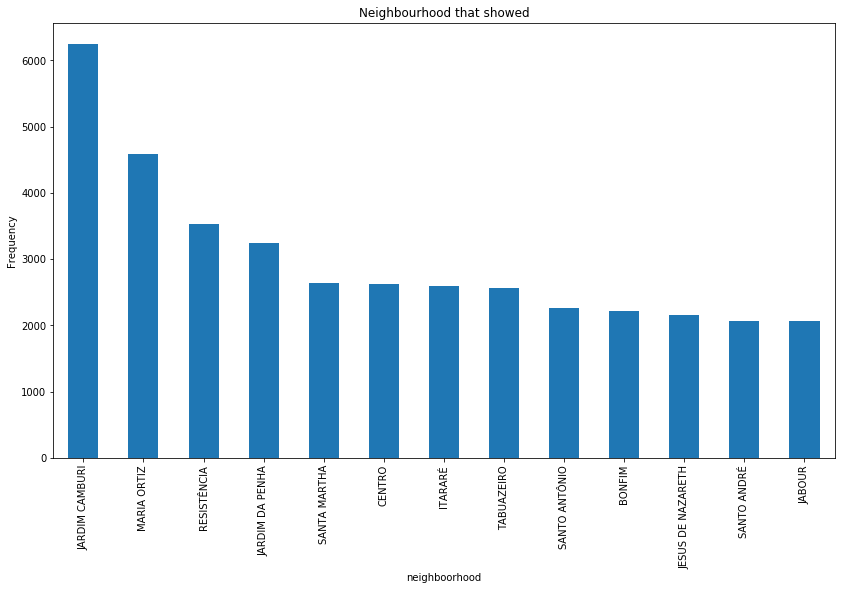

In [43]:
#df_neighbourhood1 = df_neighbourhood['noshow', 'neighbourhood'].filter(lambda x: len(x) > 1000)
'''ax = df_1['neighbourhood'].value_counts().plot(kind='bar', figsize=(14,8), title="Neighbourhood that showed")
ax.set_xlabel("neighboorhood")
ax.set_ylabel("Frequency")'''
count = df_1['neighbourhood'].value_counts()
ax = count[count > 2000].plot(kind='bar', figsize=(14,8), title="Neighbourhood that showed")
ax.set_xlabel("neighboorhood") 
ax.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

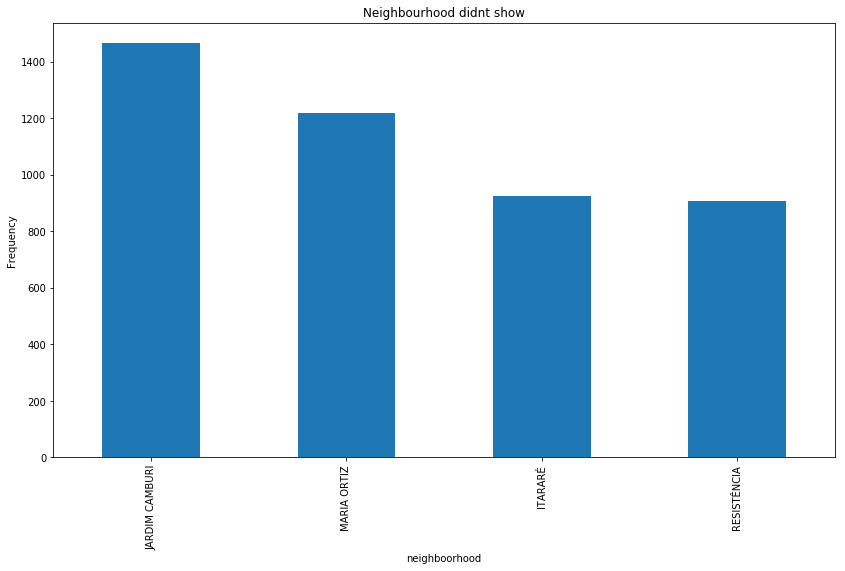

In [44]:
#df_22=df.loc[df_2['noshow'] < 1 , 'noshow'] = 1
df_neighbourhood = df_2[['noshow', 'neighbourhood']].groupby('neighbourhood')['noshow'].count()
count1 = df_2['neighbourhood'].value_counts()

ax = count1[count1 > 800].plot(kind='bar', figsize=(14,8), title="Neighbourhood didnt show")
ax.set_xlabel("neighboorhood") 
ax.set_ylabel("Frequency")

### CONCLUSION
- Well JARDIM CAMDURI and MARIA ORTIZ neighbourhood showed up more and also didnt show up. i can just say that data from that neighbourhood is more in the data we are given.
- The only neighbourhood unique is the ITARARE the appeared top in the visualisation as neighnourhood who doesnt show up.

### AGE

Text(0,0.5,'Frequency')

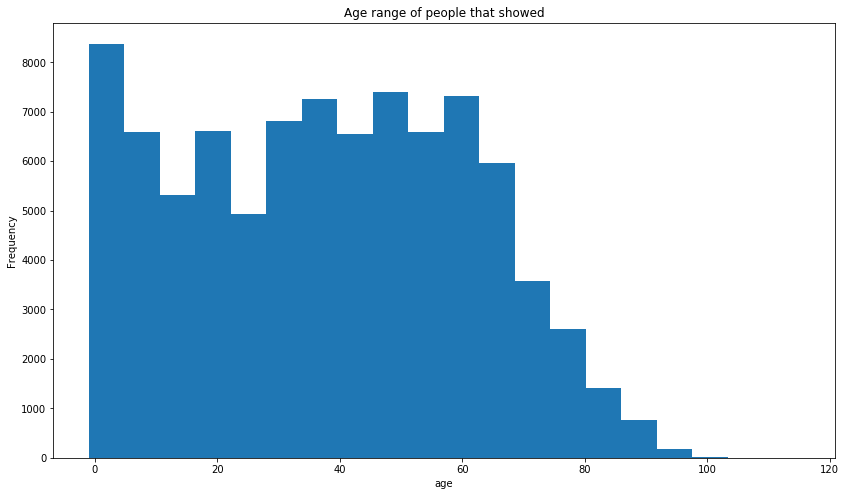

In [45]:
# showing the distribution of age
ax = df_1['age'].plot(kind='hist', figsize=(14,8), title="Age range of people that showed", bins = 20)
ax.set_xlabel("age") 
ax.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

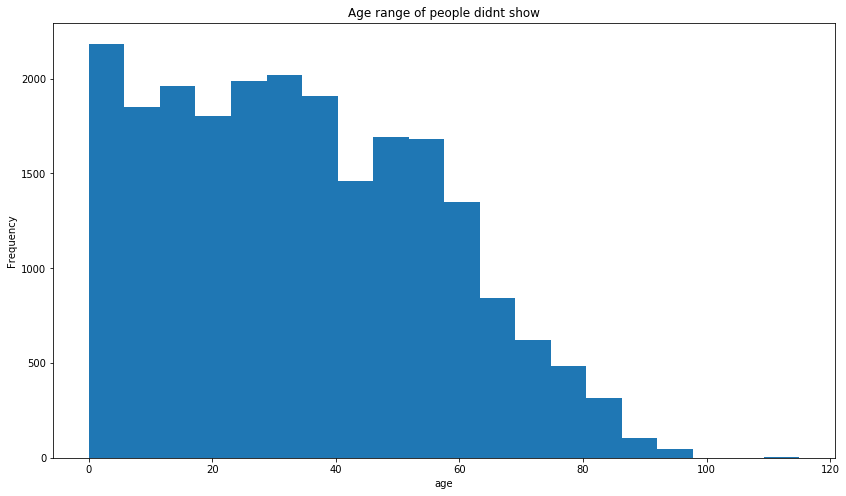

In [46]:
ax = df_2['age'].plot(kind='hist', figsize=(14,8), title="Age range of people didnt show", bins = 20)
ax.set_xlabel("age") 
ax.set_ylabel("Frequency")

### CONCLUSION
- Age deosnt affect who shows or not

In [47]:
#df_1.hist(figsize = (10,8));

In [48]:
#df_2.hist(figsize = (10,8));

<a id='conclusions'></a>
## Conclusions
Nearly 80% of all appointments investigated were no-shows. 

Limitations:
- The data set had some grammartical errors.
- There should be more data such as traffic, doctors etc.

Findings:
<br>Age distribution of no-shows and shows.
- I couldnt draw a concrete conclusion from that age data given.>

Neighbourhood data for no-shows and shows.
- I could draw just a little conclusion from that data given.

SMS notification of no-shows versus shows by patients.
- Few patients got sms and so conclusion couldnt be made.

What scheduled day do people show up and dont show?
- Apparently Tuesday and Wednesday are the days when people show up the most and also the same day when people dont also show up.
